### Problem Statement:-

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The company wants to know :-


  - Which variables are significant in predicting the price of a               house, and*
   
   - How well those variables describe the price of a house.*
   
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.   


### Business Goal:- 

   - Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.
   
   - Determine the optimal value of lambda for ridge and lasso regression.

   - This model will then be used by the management to understand how exactly the prices vary with the variables
 
   - They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
 
   - The model will be a good way for the management to understand the pricing dynamics of a new market.



***Step 1: Reading and understanding the Data**

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from sklearn import linear_model, metrics

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [3]:
# Loading the dataset
housing_df = pd.read_csv('train.csv')
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Let's check some random samples
housing_df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
622,623,20,RL,71.0,7064,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,135000
712,713,120,RL,40.0,4671,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,189000
756,757,60,RL,68.0,10769,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,212000
109,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000


By Using `head()` or `sample`, it can be observed that there are some null values are in the dataframe.

In [5]:
# Let's check the shape of df
housing_df.shape

(1460, 81)

We can observe the `DataFrame` has 1460 rows and 81 columns.

In [6]:
# Let's check the types of the columns and null values and null value counts.
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

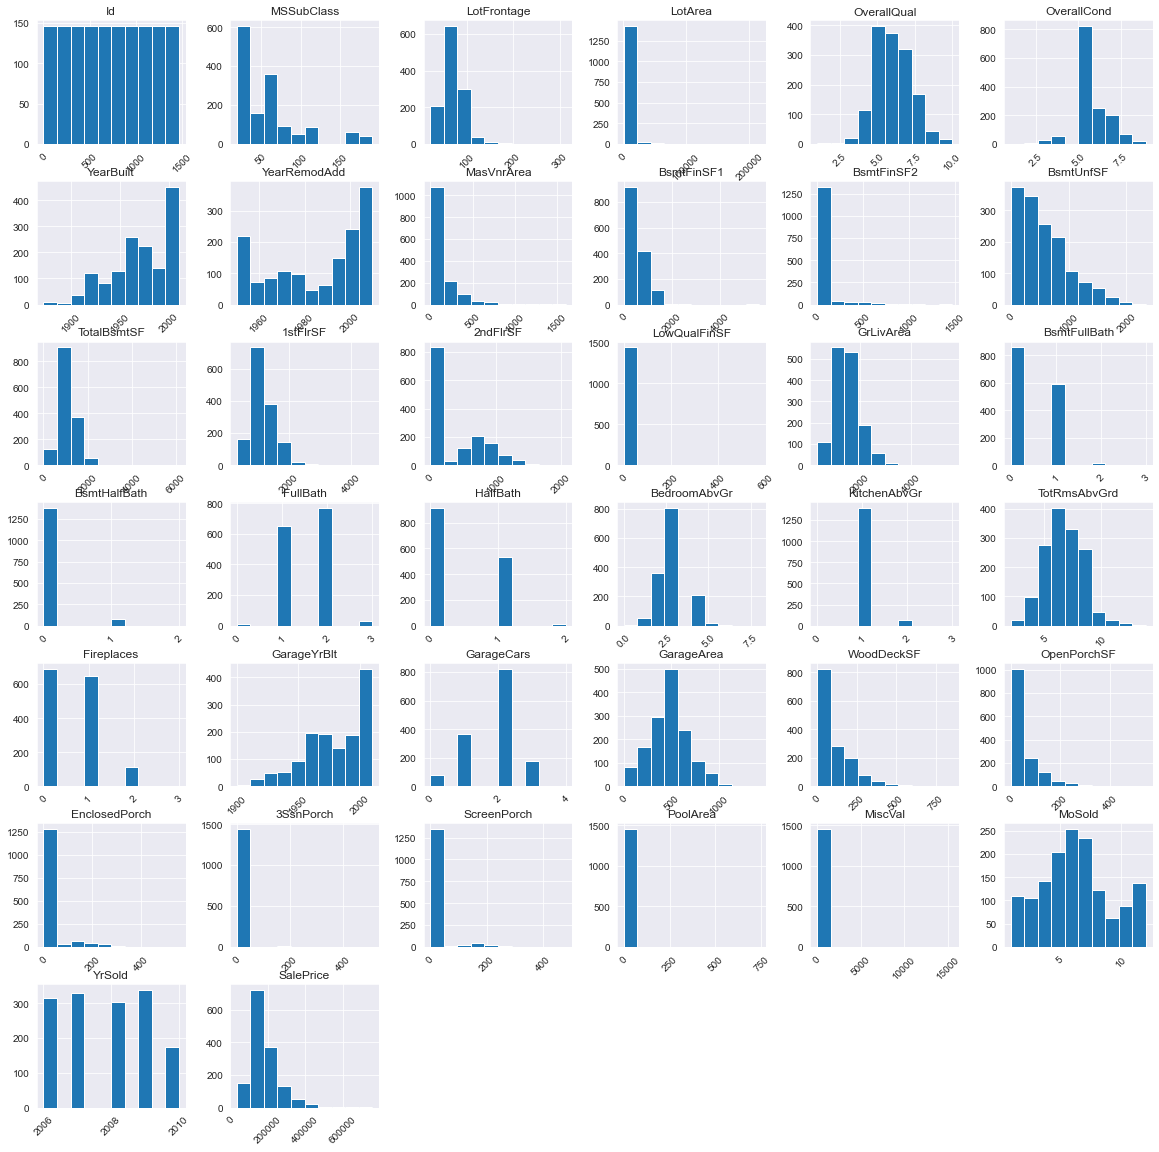

In [7]:
# Let's check the distributions of numeric columns
housing_df.hist(figsize= (20,20), xrot= 45)
plt.show()

As we can see , Our target variable `Sale Price` is highly skewed between 0 to 200 thousand.

In [8]:
# Let's see the distribution using `describe` method too-
housing_df.describe(include= ['int64','float64'])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# Let's have a look of categorical statistical summary
housing_df.describe(include= 'object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


**Plot categorical distributions**

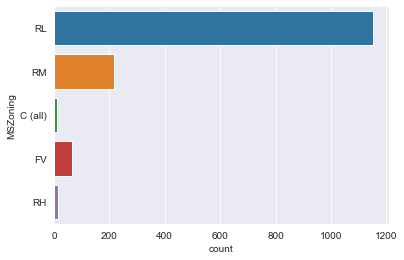

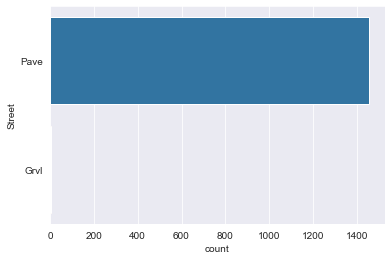

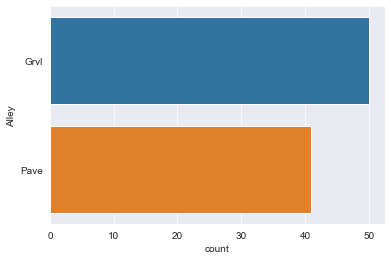

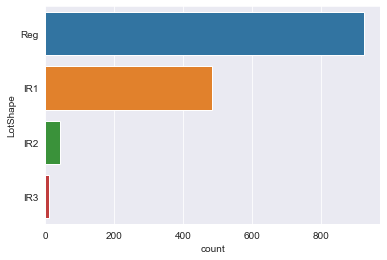

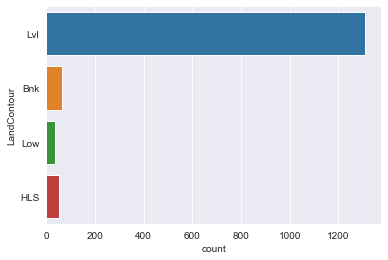

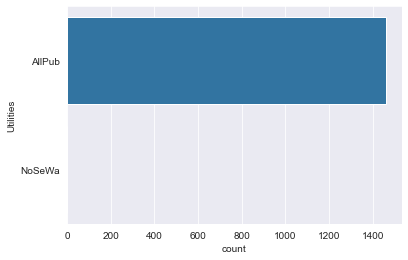

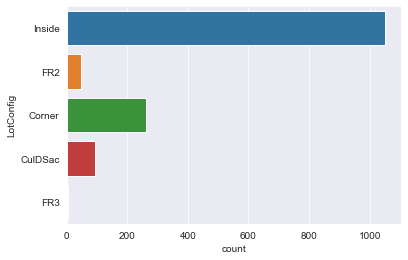

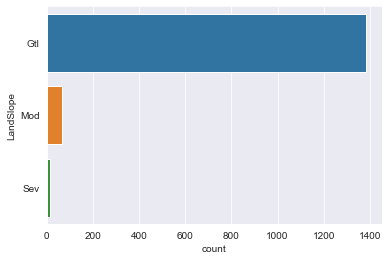

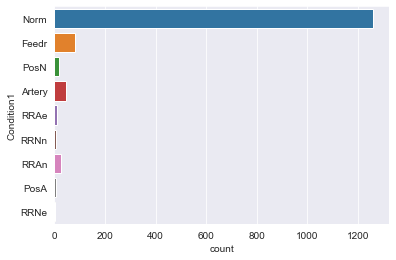

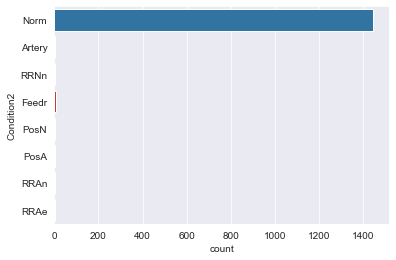

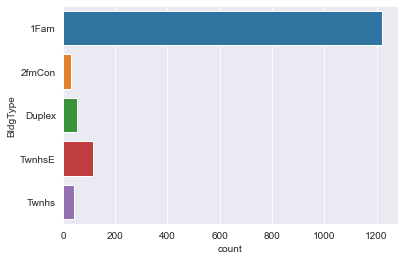

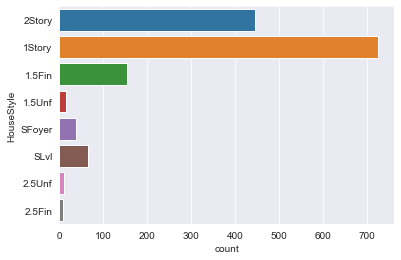

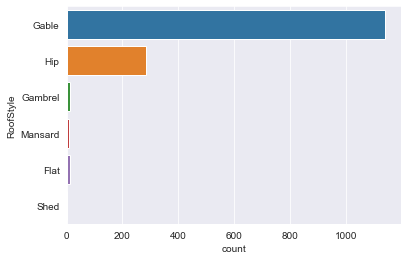

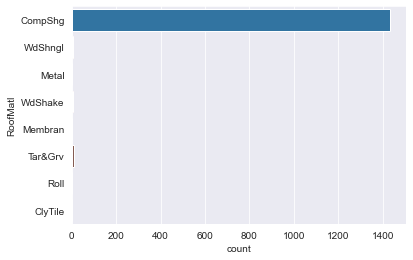

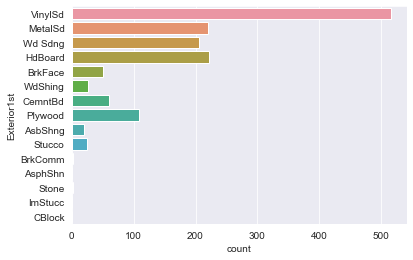

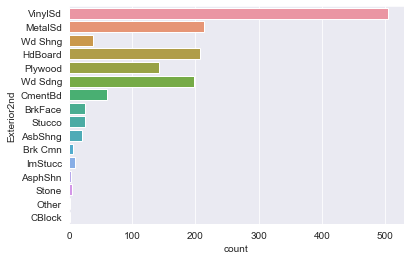

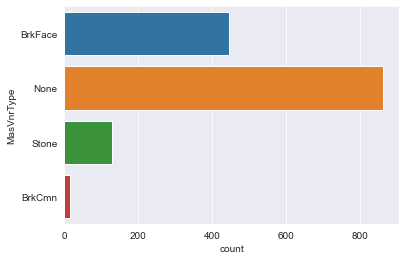

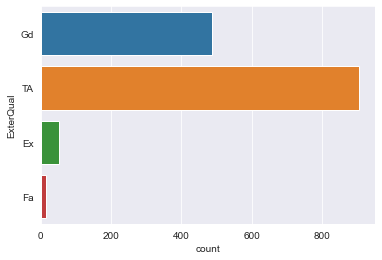

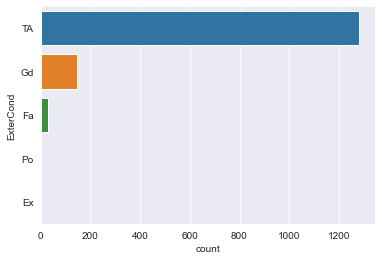

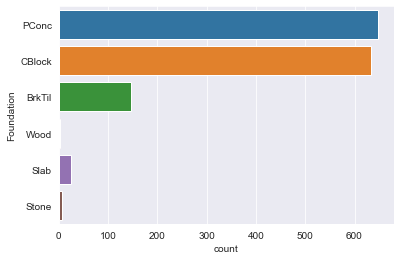

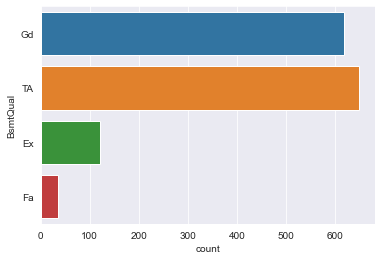

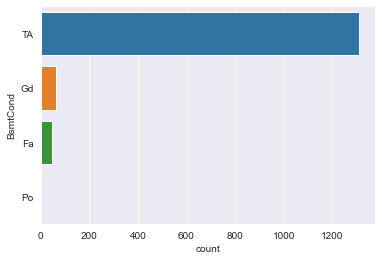

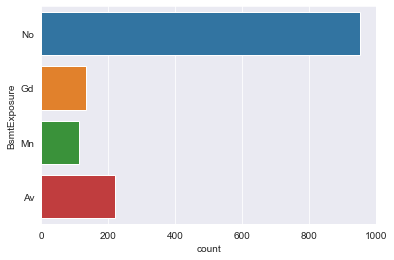

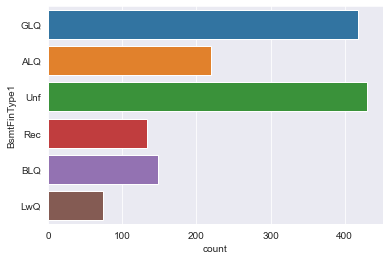

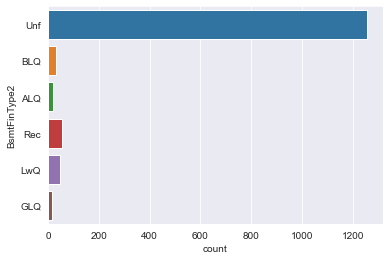

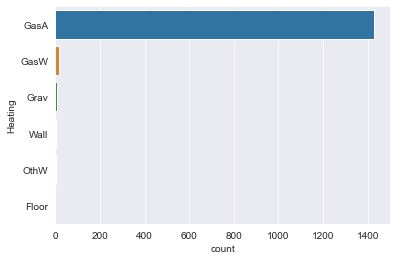

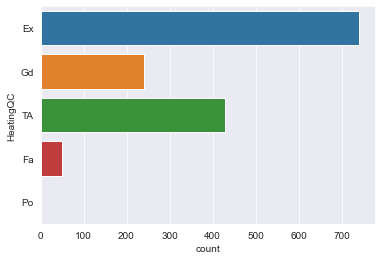

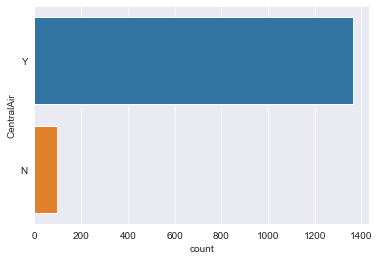

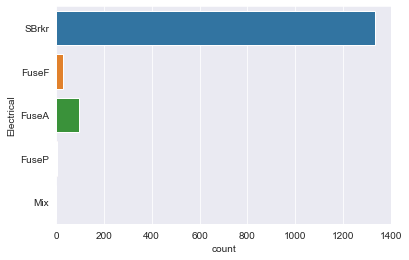

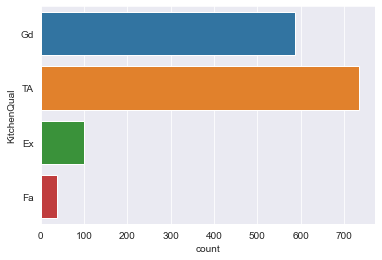

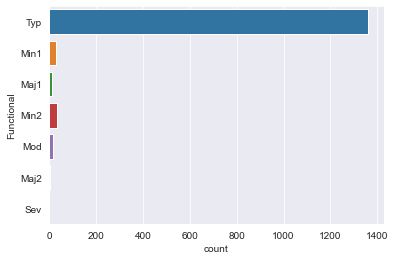

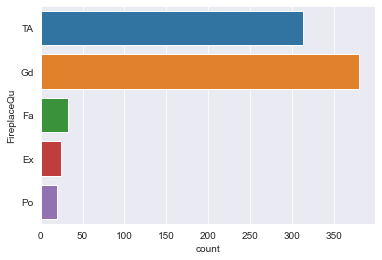

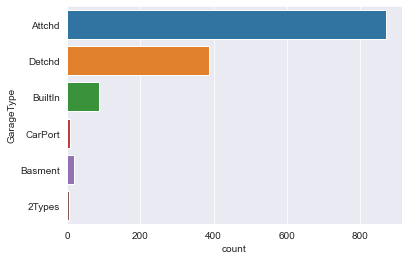

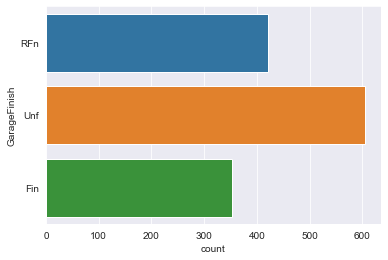

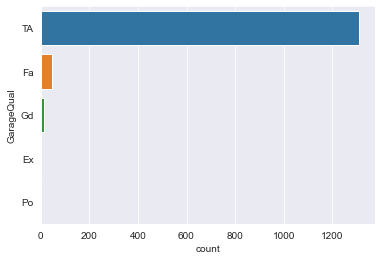

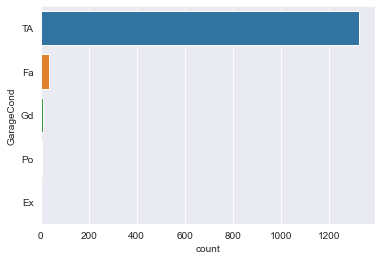

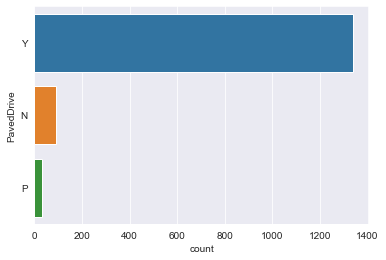

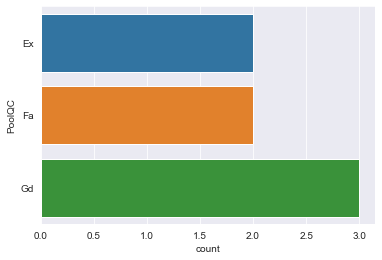

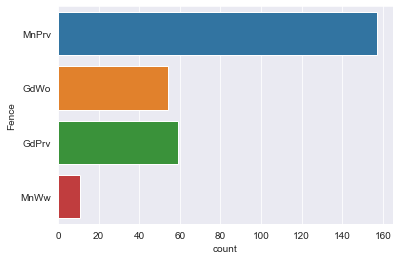

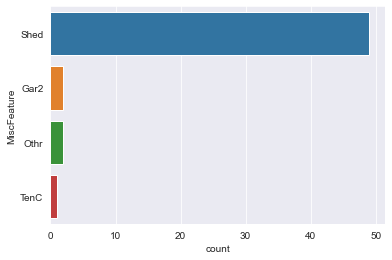

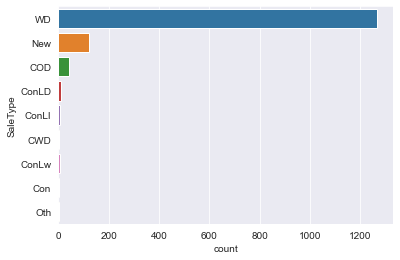

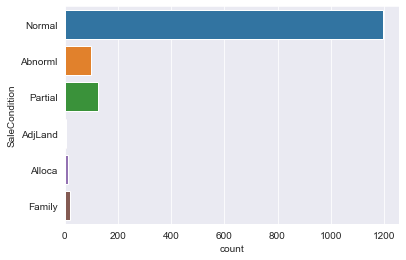

In [10]:
for col in housing_df.select_dtypes(include = 'object'):
    if housing_df[col].nunique()<=20:
        sns.countplot(y = col, data = housing_df)
        plt.show()

### Inspecting the missing values:-

As we can observe, we have very limited data, So deleting rows or columns means loosing data, So in that case, it is ideal to fill those null values using business understanding.

In [11]:
# check for null values in all categorical columns

housing_df.select_dtypes(include='object').isnull().sum()[housing_df.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### Imputing the missing values:-


**Similarly let's fill other variables missing values:-**

In [12]:
# Replace NA with None in those features:-
for col in ('Alley','MasVnrType', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
           'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual'
           ,'GarageCond','PoolQC','Fence','MiscFeature'):
    housing_df[col] = housing_df[col].fillna('None')     
     

Now we can remove the features which have more than 85% associated to one value, Since it would be higly skewed in that case.

In [13]:
# Dropping the columns which have more 85% values related to one particular values 
def high_cat_value_counts():
    column = []
    categorical_col = housing_df.select_dtypes(include = ['object'])
    for col in (categorical_col):
        if(housing_df[col].value_counts().max()>=1241):
            column.append(col)
    return column


col_to_remove = high_cat_value_counts()

# Removing the colulmns with skewed data
housing_df.drop(col_to_remove, axis= 1, inplace= True)
housing_df.head()
    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [14]:
# Check the null values again:-
housing_df.select_dtypes(include = 'object').isnull().sum()

MSZoning         0
LotShape         0
LotConfig        0
Neighborhood     0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
HeatingQC        0
KitchenQual      0
FireplaceQu      0
GarageType       0
GarageFinish     0
Fence            0
SaleCondition    0
dtype: int64

As we can see there are no null values in above give categorical variables.

***Removing null values in Numerical variables:-***

In [15]:
# Check the null values in numerical variables:-
housing_df.select_dtypes(include= ['int64','float64']).isnull().sum()[housing_df.select_dtypes(include= ['int64','float64']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [16]:
# Let's inspect these column one by one
housing_df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [17]:
# Inspecting 'MasVnrArea'
housing_df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [18]:
# Let's inspect 'GarageYrBlt' too.
housing_df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [19]:
# Impute the null values with median values for LotFrontage and MasVnrArea columns

housing_df['LotFrontage'] = housing_df['LotFrontage'].replace(np.nan, housing_df['LotFrontage'].median())
housing_df['MasVnrArea'] = housing_df['MasVnrArea'].replace(np.nan, housing_df['MasVnrArea'].median())

In [20]:
#Imputting the null values with 0 for GarageYrBlt.

housing_df['GarageYrBlt']= housing_df['GarageYrBlt'].fillna(0)
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].astype(int)

In [21]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  MasVnrAr

In [22]:
housing_df.YearRemodAdd

0       2003
1       1976
2       2002
3       1970
4       2000
        ... 
1455    2000
1456    1988
1457    2006
1458    1996
1459    1965
Name: YearRemodAdd, Length: 1460, dtype: int64

***Creating some derived matrix based on year variables***

In [23]:
# Creating a drived coulumn 'IsRemodelled':-
def chec_Remodel(x):
    if x['YearBuilt'] == x['YearRemodAdd']:
        return 0
    elif (x['YearBuilt']) < x['YearRemodAdd']:
        return 1
    else:
        return 2

housing_df['IsRemodelled'] = housing_df.apply(chec_Remodel, axis= 1) 
housing_df.head()
    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,0


In [24]:
# Creating another variable 'BuildingAge'
def get_building_Age(x):
    if x['YearBuilt'] == x['YearRemodAdd']:
        return x['YrSold'] - x['YearBuilt']
    else:
        return x['YrSold'] - x['YearRemodAdd']
    
    
housing_df['BuildingAge'] = housing_df.apply(get_building_Age,axis= 1) 
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuildingAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,8


In [25]:
# Let's create the another drive columns 'GarageNewOrOld'
# if gerrage is older than 2000 means 'old' otherwise 'new'
def gerage_category(X):
    if X == 0:
        return 0
    elif X >= 1900  and X<2000:
        return 0
    else:
        return 1 
    
housing_df['GarageNewOrOld'] = housing_df['GarageYrBlt'].apply(gerage_category) 
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuildingAge,GarageNewOrOld
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,0,8,1


In [26]:
# Let's drop the variable YearBuilt, YearRemodAdd,YrSold and GarageBlt,
# as we have already used them for our purpose.
housing_df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'],axis = 1, inplace= True)

In [27]:
# Dropping the variable 'MoSold', as it's not worthwhile at the momemt
housing_df.drop('MoSold', axis= 1, inplace= True)

In [28]:
# Dropping the columns that have more than 85% values associated to a specific values
# as it will help us to control variance in particular values
def get_High_values():
    column = []
    num_vars = housing_df.select_dtypes(include= ['int64','float'])
    for col in (num_vars):
        if (housing_df[col].value_counts().max() >=1241):
            column.append(col)
        return col   
    
    
ColRemoved = get_High_values()
housing_df.drop(ColRemoved, axis= 1, inplace= True)

In [29]:
# Let's check the shape again:-
housing_df.shape

(1460, 57)

In [30]:
# Checking the percentage of null values in each column
null_values = round(100*(housing_df.isnull().sum()/len(housing_df.index)),2)
print(null_values)

MSSubClass        0.0
MSZoning          0.0
LotFrontage       0.0
LotArea           0.0
LotShape          0.0
LotConfig         0.0
Neighborhood      0.0
BldgType          0.0
HouseStyle        0.0
OverallQual       0.0
OverallCond       0.0
RoofStyle         0.0
Exterior1st       0.0
Exterior2nd       0.0
MasVnrType        0.0
MasVnrArea        0.0
ExterQual         0.0
Foundation        0.0
BsmtQual          0.0
BsmtExposure      0.0
BsmtFinType1      0.0
BsmtFinSF1        0.0
BsmtFinSF2        0.0
BsmtUnfSF         0.0
TotalBsmtSF       0.0
HeatingQC         0.0
1stFlrSF          0.0
2ndFlrSF          0.0
LowQualFinSF      0.0
GrLivArea         0.0
BsmtFullBath      0.0
BsmtHalfBath      0.0
FullBath          0.0
HalfBath          0.0
BedroomAbvGr      0.0
KitchenAbvGr      0.0
KitchenQual       0.0
TotRmsAbvGrd      0.0
Fireplaces        0.0
FireplaceQu       0.0
GarageType        0.0
GarageFinish      0.0
GarageCars        0.0
GarageArea        0.0
WoodDeckSF        0.0
OpenPorchS

Now we can see, there are no null values.

In [31]:
# Checking for duplicates
housing_df.duplicated(keep='first').sum()

0

**Analyzing the outliers:-**

##### Outlier Detection:-
      Checking the perecentage of outliers in all the numeric columns

In [32]:
# Checking the outliers at 25%,50%,75%, 90% , 95% ,99%  and above
housing_df.describe(percentiles= [.25,.50,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,IsRemodelled,BuildingAge,GarageNewOrOld
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1057.429452,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,0.476712,22.950000,0.275342
std,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,438.705324,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,0.499629,20.640653,0.446840
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,0.000000,14.000000,0.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,1.000000,41.000000,1.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,...,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000,1.000000,56.000000,1.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,...,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000,1.000000,58.000000,1.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,...,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000,1.000000,60.000000,1.000000


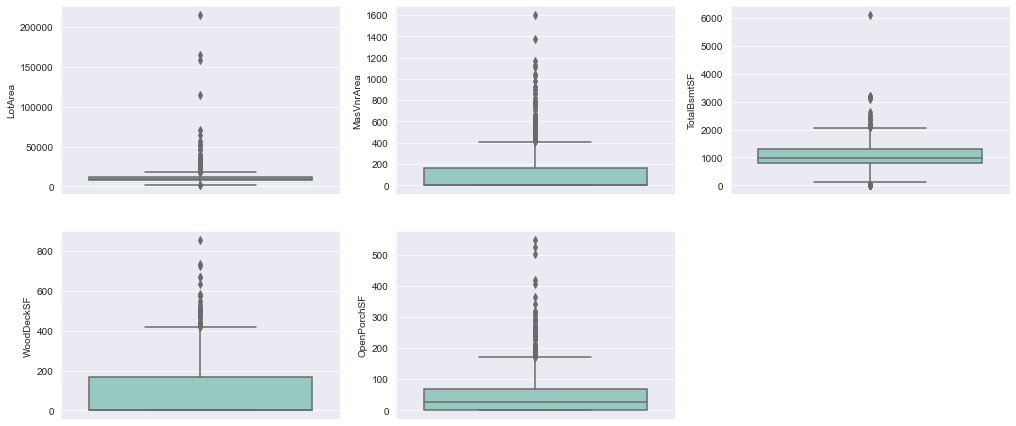

In [33]:
# Visulation of outliers in variables using boxplots
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = housing_df)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = housing_df)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = housing_df)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = housing_df)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = housing_df)
plt.show()

### Insights:- 
   - Most of the numeric features have outliers, and dropping them is going to cuase loss of information.So giving them outlier treatment will be good option.

***Outliers Treatment in those varibels:-***

In [34]:
# Removing values beyond 97% for LotArea

quartile_LotArea = housing_df['LotArea'].quantile(0.97)
housing_df = housing_df[housing_df["LotArea"] < quartile_LotArea]

# Removing values beyond 97% for MasVnrArea

quartile_MasVnrArea = housing_df['MasVnrArea'].quantile(0.97)
housing_df = housing_df[housing_df["MasVnrArea"] < quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

quartile_TotalBsmtSF = housing_df['TotalBsmtSF'].quantile(0.99)
housing_df =housing_df[housing_df["TotalBsmtSF"] < quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

quartile_WoodDeckSF = housing_df['WoodDeckSF'].quantile(0.99)
housing_df = housing_df[housing_df["WoodDeckSF"] < quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

quartile_OpenPorchSF = housing_df['OpenPorchSF'].quantile(0.99)
housing_df = housing_df[housing_df["OpenPorchSF"] < quartile_OpenPorchSF]

In [35]:
# Let's check the dataframe shape after treating outliers
housing_df.shape

(1331, 57)

In [36]:
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,SaleCondition,SalePrice,IsRemodelled,BuildingAge,GarageNewOrOld
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,0,0,0,None,0,Normal,208500,0,5,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,0,0,0,None,0,Normal,181500,0,31,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,0,0,0,None,0,Normal,223500,1,6,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,0,0,0,None,0,Abnorml,140000,1,36,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,0,0,0,None,0,Normal,250000,0,8,1


## Data Visulation:-

<Figure size 720x360 with 0 Axes>

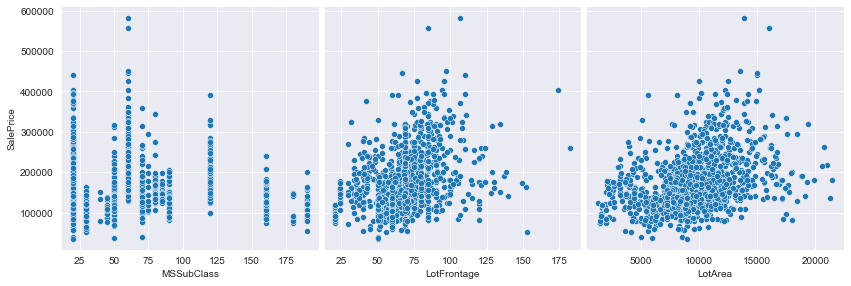

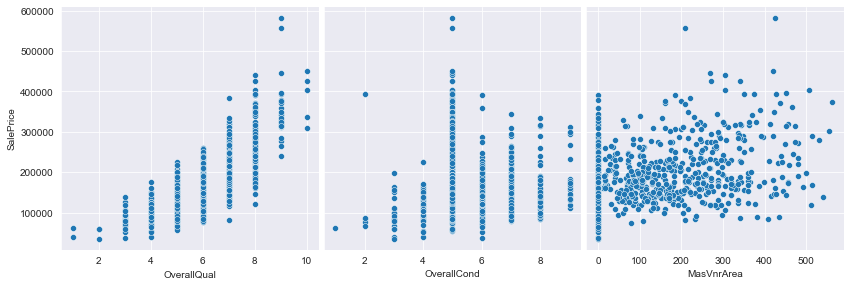

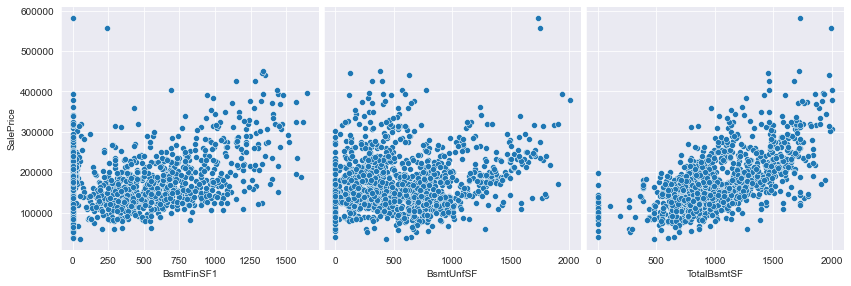

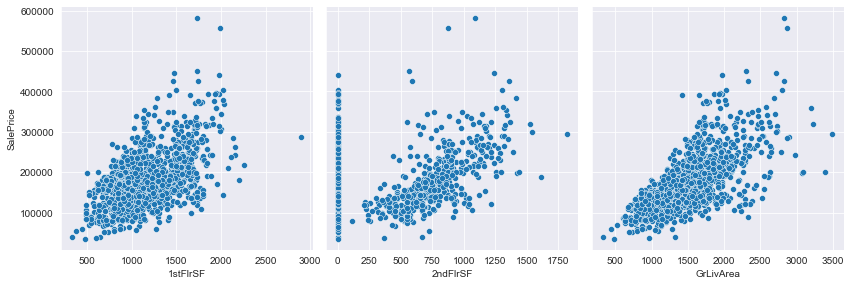

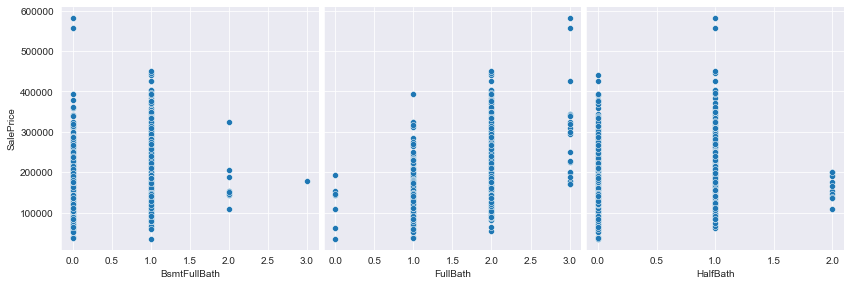

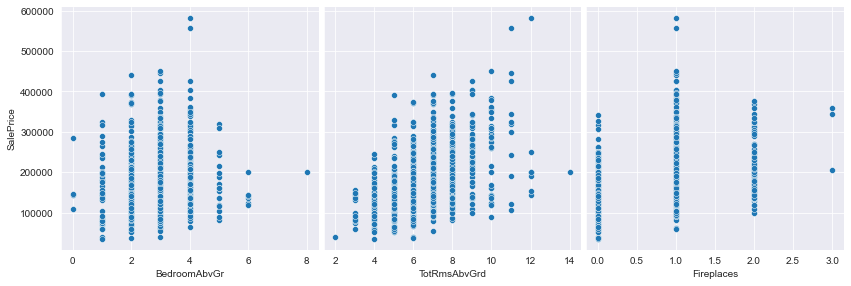

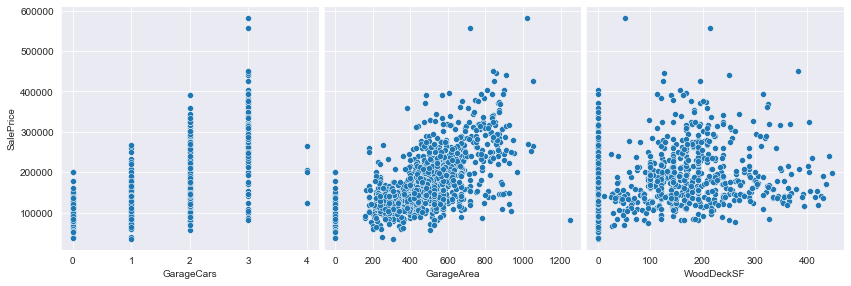

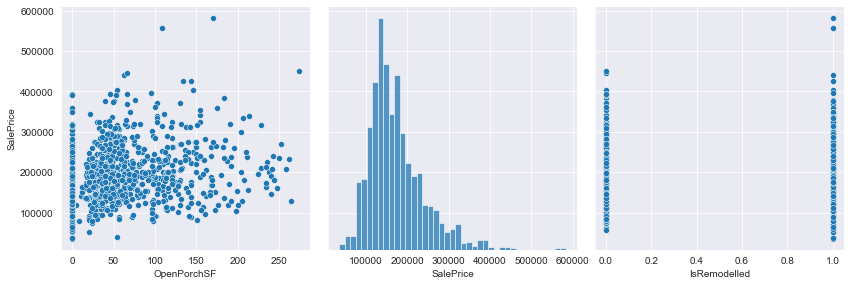

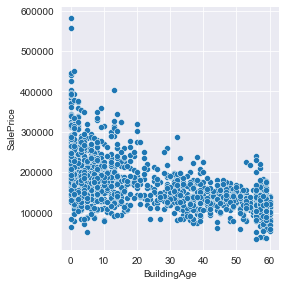

In [37]:

# Visualising the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(housing_df, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_df, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_df, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_df, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_df, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_df, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_df, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_df, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_df, x_vars=['BuildingAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

We can notice that 1stFlSF, GrLivArea are showing right side correlations. and other variabels are so much scattered that at this stage it's hard to make any assumptions.

In [38]:
# Let's check the correlation of between all the numeric variables
housing_df.corr().T

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,IsRemodelled,BuildingAge,GarageNewOrOld
MSSubClass,1.000000,-0.406325,-0.418005,0.063855,-0.055752,0.027722,-0.069077,-0.051702,-0.131441,-0.245421,...,0.003482,-0.013595,-0.043462,-0.022519,-0.006167,-0.011042,-0.066173,-0.047990,-0.054352,0.045382
LotFrontage,-0.406325,1.000000,0.589659,0.189110,-0.051442,0.160580,0.120111,0.032721,0.128177,0.289245,...,0.129186,0.003429,0.084341,0.048757,0.023345,0.006918,0.342476,-0.046152,-0.062582,0.071603
LotArea,-0.418005,0.589659,1.000000,0.175370,-0.030372,0.112430,0.159558,0.086842,0.085303,0.306047,...,0.140367,0.000507,0.093798,0.088006,0.038648,0.073341,0.381802,-0.003765,-0.041808,-0.012084
OverallQual,0.063855,0.189110,0.175370,1.000000,-0.100483,0.375820,0.194612,-0.062385,0.288405,0.512050,...,0.357397,-0.125532,0.041773,0.057100,0.010155,-0.027377,0.799040,-0.105597,-0.553595,0.568592
OverallCond,-0.055752,-0.051442,-0.030372,-0.100483,1.000000,-0.128565,-0.022767,0.047421,-0.145413,-0.169694,...,-0.065658,0.086455,0.011727,0.048371,0.004824,0.067253,-0.092411,0.313882,-0.072401,-0.292163
MasVnrArea,0.027722,0.160580,0.112430,0.375820,-0.128565,1.000000,0.228528,-0.050901,0.076310,0.313422,...,0.173694,-0.103012,0.044990,0.069955,0.004280,-0.027271,0.419675,-0.168642,-0.156198,0.177138
BsmtFinSF1,-0.069077,0.120111,0.159558,0.194612,-0.022767,0.228528,1.000000,-0.060651,-0.556444,0.430435,...,0.070852,-0.119899,0.035246,0.078976,0.027547,0.008575,0.362273,-0.129935,-0.120877,0.010806
BsmtFinSF2,-0.051702,0.032721,0.086842,-0.062385,0.047421,-0.050901,-0.060651,1.000000,-0.224649,0.095942,...,-0.005149,0.043618,-0.030236,0.044904,0.070938,0.005418,-0.020670,-0.021294,0.068911,-0.159337
BsmtUnfSF,-0.131441,0.128177,0.085303,0.288405,-0.145413,0.076310,-0.556444,-0.224649,1.000000,0.434909,...,0.131133,-0.000225,0.031718,-0.020950,-0.036071,-0.024828,0.203567,0.037584,-0.184277,0.339995
TotalBsmtSF,-0.245421,0.289245,0.306047,0.512050,-0.169694,0.313422,0.430435,0.095942,0.434909,1.000000,...,0.223334,-0.112305,0.061616,0.080727,0.018586,-0.016556,0.615393,-0.107398,-0.311314,0.330522


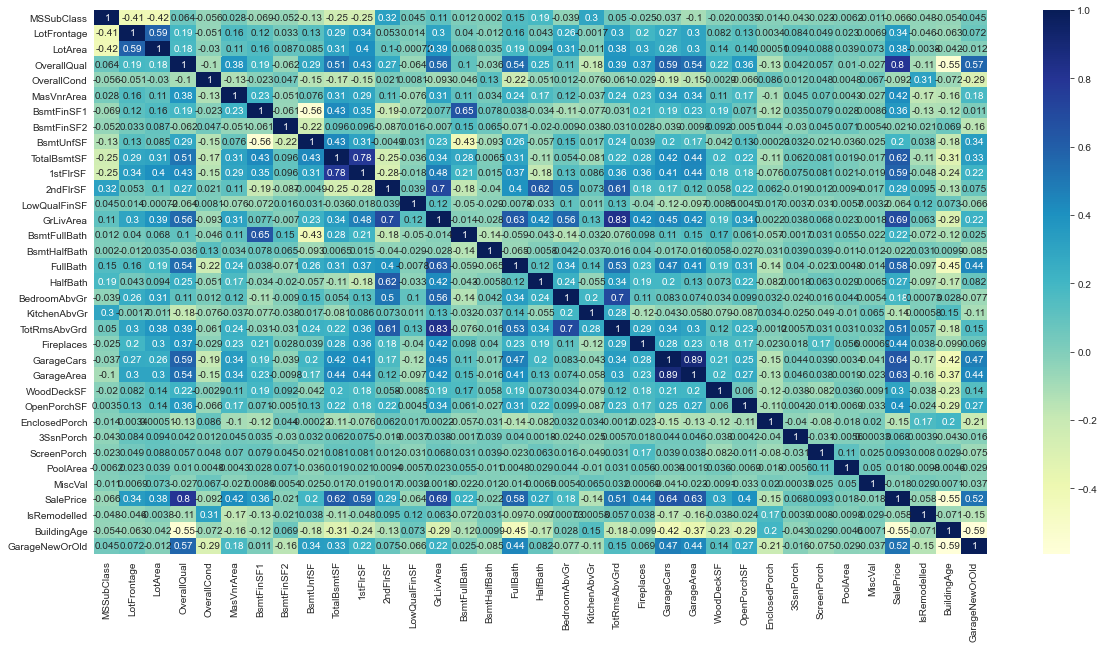

In [39]:
# Let's check the correlation of between all the numeric variables
# Using heatmap
plt.figure(figsize= (20,10))
sns.heatmap(housing_df.corr(), annot= True,  cmap="YlGnBu")
plt.show()


As we can observe:-
1- TotRmsAbvGrd and GrLivArea show 82%
2- Garage Area and Garage Cars show 88% 
  Correlations, so it's good idea to delete one of the feature from both at this stage. Rest we can drop after checking feature value, while model building process.

In [40]:
# Dropping the highly correalted features
housing_df.drop(['TotRmsAbvGrd','GarageArea'], axis= 1, inplace= True)

In [41]:
# Check the shape of df
housing_df.shape

(1331, 55)

### Visualization of Numeric features:-


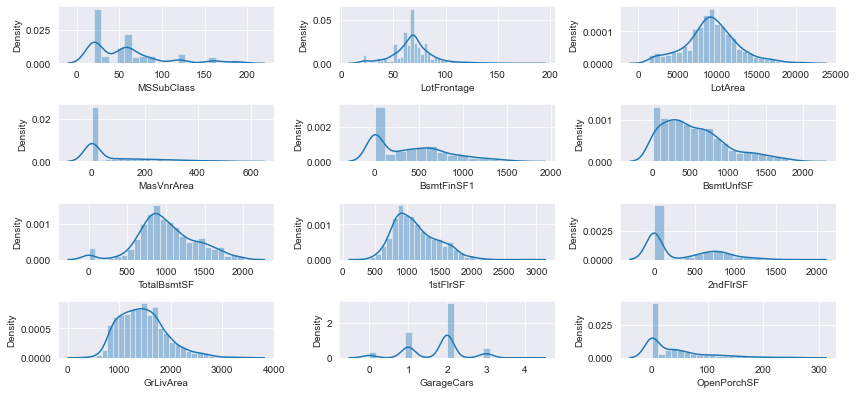

In [42]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea', 'GarageCars', 'OpenPorchSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot(housing_df[feature])
    plt.tight_layout()

We can notice some of the variable are not normally distributed either left or right skewed.

### Visualizing Categorical variables against Sales:-

In [43]:
# Function to generate boxplot for SalePrice against different features given the list of features

def generate_boxplot(feature_list):
    fig=plt.subplots(figsize=(20, 16))
    for i, feature in enumerate(feature_list):
        plt.subplot(4, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(housing_df['SalePrice'], housing_df[feature])
        plt.tight_layout()

***Visualising Houses Price based on their features:- such as exterior, interior etc***

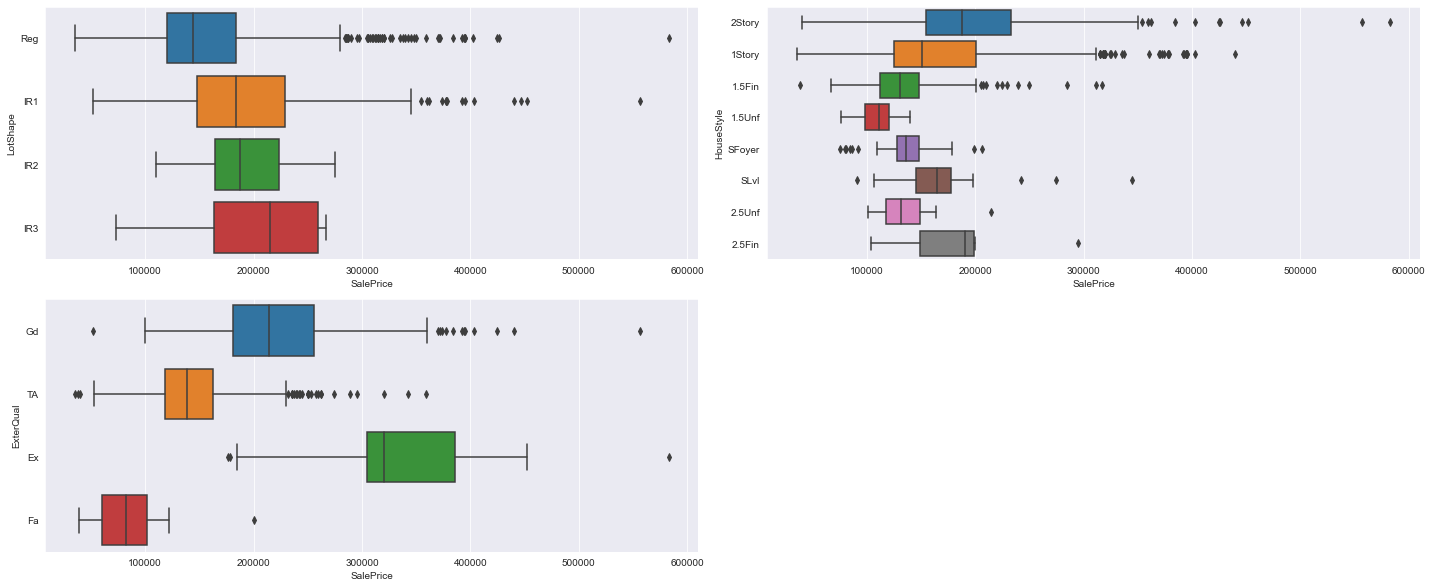

In [44]:
exterior_features = ['LotShape','HouseStyle', 'ExterQual',]

generate_boxplot(exterior_features)

'LotShape'has the highest Sale price, and2 stories houses are the most expensive.

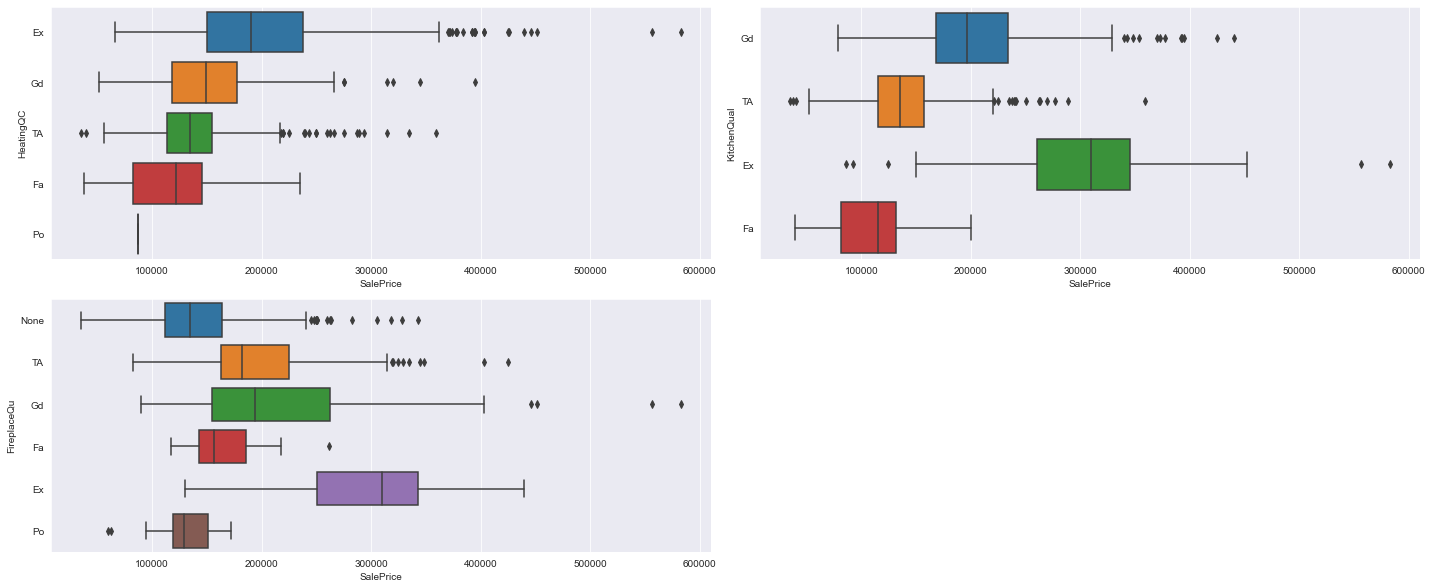

In [45]:
int_features = ['HeatingQC', 'KitchenQual','FireplaceQu']

generate_boxplot(int_features)


Houses having good heating qualitiy and good kitchen are the most valued ones.

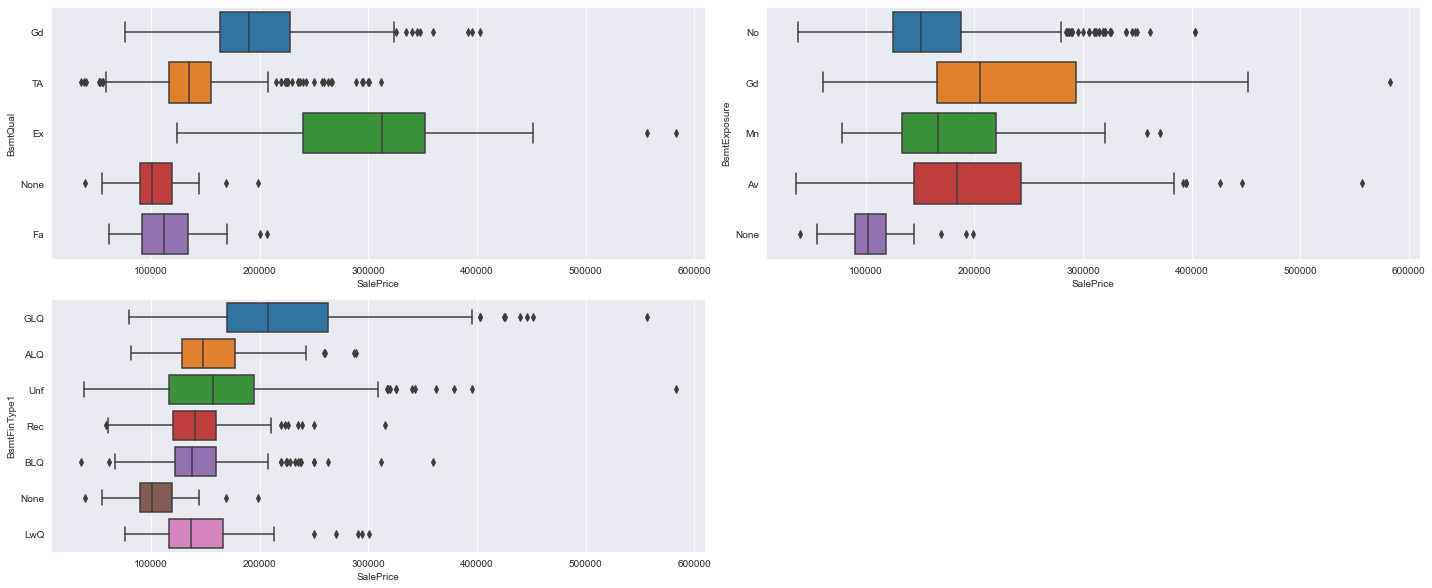

In [46]:
basement_features = ['BsmtQual', 'BsmtExposure', 'BsmtFinType1', ]

generate_boxplot(basement_features)

## Data Preparation:-

- Converting Categorical data into numeric form
- Creating Dummies

In [47]:
# Converting features into numeric forms
housing_df['d_LotShape'] = housing_df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
housing_df['d_ExterQual'] =housing_df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housing_df['d_BsmtQual'] = housing_df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df['d_BsmtExposure'] = housing_df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housing_df['d_BsmtFinType1'] = housing_df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
housing_df['d_HeatingQC'] = housing_df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df['d_KitchenQual'] = housing_df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df['d_FireplaceQu'] = housing_df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df['d_GarageFinish'] = housing_df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
housing_df['d_BldgType'] = housing_df['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
housing_df['d_HouseStyle'] = housing_df['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
housing_df['d_Fence'] = housing_df['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
housing_df['d_LotConfig'] = housing_df['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
housing_df['d_MasVnrType'] = housing_df['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
housing_df['d_SaleCondition'] = housing_df['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,5,4,3,2,1,4,0,2,1,1


In [48]:
# Dropping the old duplicate columns
housing_df = housing_df.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


### Creating dummy variables:-

In [49]:
# Creating dummies for MSZoning

mz = pd.get_dummies(housing_df['MSZoning'], prefix='MSZoning', drop_first = True)
housing_df = pd.concat([housing_df,mz], axis = 1)

# Creating dummies for Neighborhood

nd = pd.get_dummies(housing_df['Neighborhood'], prefix='Neighborhood', drop_first = True)
housing_df= pd.concat([housing_df, nd], axis = 1)

# Creating dummies for RoofStyle

rs = pd.get_dummies(housing_df['RoofStyle'], prefix='RoofStyle', drop_first = True)
housing_df = pd.concat([housing_df, rs], axis = 1)

# Creating dummies for Exterior1st

er = pd.get_dummies(housing_df['Exterior1st'], prefix='Exterior1st', drop_first = True)
housing_df = pd.concat([housing_df,er], axis = 1)

# Creating dummies for Exterior2nd

er_2 = pd.get_dummies(housing_df['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
housing_df = pd.concat([housing_df, er_2], axis = 1)

# Creating dummies for Foundation

fd = pd.get_dummies(housing_df['Foundation'], prefix='Foundation', drop_first = True)
housing_df = pd.concat([housing_df,fd], axis = 1)

# Creating dummies for GarageType

Gt = pd.get_dummies(housing_df['GarageType'], prefix='GarageType', drop_first = True)
housing_df = pd.concat([housing_df, Gt], axis = 1)

housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [50]:
# drop the below columns as we now have new dummy columns for them

housing_df = housing_df.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

housing_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,1,0,0,0,1,0,0,0,0,0


In [51]:
# Let's check the shape of the df again
housing_df.shape

(1331, 121)

In [52]:
# checking the info
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1331 entries, 0 to 1458
Columns: 121 entries, MSSubClass to GarageType_None
dtypes: float64(2), int64(46), uint8(73)
memory usage: 636.7 KB


In [53]:
housing_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=121)

# Train-Test Split:-

In [54]:
# Creating X and y variables
X = housing_df.drop(['SalePrice'], axis= 1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,1,0,0,0,1,0,0,0,0,0


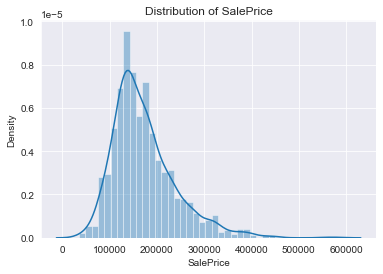

In [55]:
# Checking the distribution of  target variable 'SalePrice'
plt.title("Distribution of SalePrice")
sns.distplot(housing_df['SalePrice'])
plt.show()

Observation:- SalePrice is highly right skewed, let's transoform it using 
`log` transformation.

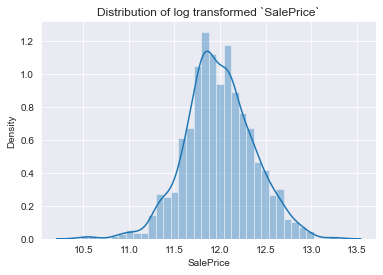

In [56]:
sns.distplot(np.log(housing_df['SalePrice']))
plt.title("Distribution of log transformed `SalePrice`")
plt.show()


In [57]:
# log transformed SalePrice is normally distributed, So it's ideal to transorm the data before using it for model building

y = np.log(housing_df['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1454    12.128111
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
Name: SalePrice, Length: 1331, dtype: float64


***Scalling the features:-***

In [58]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=120)

In [59]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

# Model Building & Evaluation:-

## Recursive Feature Elimination(RFE):-
 As we have around 121 variables , i am goint to use RFE to the best  55 variables out the 121 for the further analysis.

In [60]:
# Using RFE to get the most suitable features
lm = LinearRegression()
lm.fit(X_train,y_train)



LinearRegression()

## Linear Regression

Let's now try predicting car prices, a dataset using linear regression with all the variables.

In [61]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

368.78271596596153
[-1.51636434e-02 -1.30933832e-03  2.55628208e-02  6.32098210e-02
  4.25532105e-02  7.27414468e-03 -2.36403454e+10 -9.06169790e+09
 -2.46577207e+10  2.17689053e+10 -2.89672151e+10 -3.56972286e+10
 -4.04918649e+09  3.93747086e+10  1.55057907e-02  1.39808655e-03
  1.55541897e-02  1.67746544e-02  1.45053864e-03 -2.74372101e-03
 -4.02212143e-04  3.13901901e-02  1.12752914e-02  9.22203064e-03
  7.15446472e-03  7.28797913e-03  1.34977102e-02  5.10978699e-03
 -1.57628059e-02 -1.47056580e-02 -2.08759308e-02  2.01524496e-02
  5.15937805e-04 -9.08660889e-03  9.29260254e-03  7.74765015e-03
  1.12400055e-02  1.46844387e-02  1.83393955e-02  1.21726990e-02
  7.01582432e-03 -6.16645813e-03  1.44398212e-02  1.33419037e-03
 -1.08337402e-03 -2.20584869e-03  1.92718506e-02  6.49313927e-02
  2.88333893e-02  1.13509893e-01  8.73112679e-02 -1.36566162e-03
 -5.48732281e-03 -2.54392624e-03 -1.81567669e-03 -3.93366814e-03
  1.68414116e-02 -2.06878185e-02 -5.44929504e-03 -1.18618011e-02
 -1.34

In [62]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9214163058779774
-2097750028.8534667
10.326802477552686
112763637168.22032
0.011092161630024367
281909092.9205508


In [63]:
# Runnning RFE with 40 variables
rfe = RFE(lm,40)
rfe = rfe.fit(X_train, y_train)

In [64]:
# Assign the columns selected by RFE to cols
col = X_train.columns[rfe.support_]

# assign the 40 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,MSSubClass,True,1
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,BsmtFinSF1,True,1
5,BsmtFinSF2,True,1
6,BsmtUnfSF,True,1
7,TotalBsmtSF,True,1
8,1stFlrSF,True,1
9,2ndFlrSF,True,1


In [65]:
# Assign the 40 columns to X_train_rfe

X_train_rfe = X_train[col]

In [66]:
# Associate the new  40 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression:-

In [67]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [68]:
# Printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 100}


In [69]:
#Fitting Ridge model for alpha = 50 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.99495025e-02  2.15223933e-02  7.19989388e-02  4.17228690e-02
  4.02374641e-02  7.44109474e-03  6.64255280e-04  4.75465122e-02
  3.30426766e-02  3.12068787e-02 -1.07633817e-03  5.24904229e-02
  1.64047690e-02  2.12879566e-02  2.31847954e-02  4.24522460e-02
 -1.62490675e-02 -2.76784161e-02  1.79558382e-02  1.83696641e-02
  2.36361721e-02  2.10966260e-02  1.88541577e-02  2.40288595e-02
  2.11392741e-02  3.05476587e-03  2.17655860e-02 -6.15883969e-04
  2.15364767e-02  1.70411441e-02 -1.49874528e-02  1.51365121e-02
  1.35366919e-02 -6.67500648e-04 -3.53991399e-03 -6.74812373e-32
 -6.67500648e-04  6.98851338e-03 -4.74598163e-03  2.65939514e-02]


In [70]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9059724070397238
0.9057476008260804
12.356308656510185
5.066496575583194
0.013272082337819747
0.012666241438957986


In [71]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
24,100,-0.083169,-0.087279,1
23,50,-0.082686,-0.087374,2
22,20,-0.082406,-0.087673,3
21,10.0,-0.082204,-0.087784,4
20,9.0,-0.082174,-0.087793,5
19,8.0,-0.082143,-0.087802,6
18,7.0,-0.082112,-0.087809,7
17,6.0,-0.082080,-0.087814,8
16,5.0,-0.082047,-0.087819,9
15,4.0,-0.082011,-0.087821,10


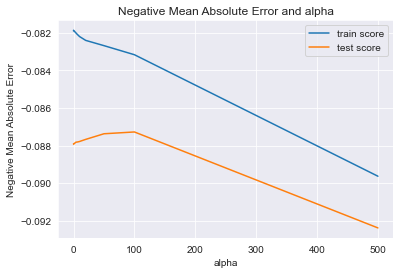

In [72]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [73]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0199
1,LotArea,0.0215
2,OverallQual,0.0720
3,OverallCond,0.0417
4,BsmtFinSF1,0.0402
5,BsmtFinSF2,0.0074
6,BsmtUnfSF,0.0007
7,TotalBsmtSF,0.0475
8,1stFlrSF,0.0330
9,2ndFlrSF,0.0312


In [74]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0199,
 'LotArea': 0.0215,
 'OverallQual': 0.072,
 'OverallCond': 0.0417,
 'BsmtFinSF1': 0.0402,
 'BsmtFinSF2': 0.0074,
 'BsmtUnfSF': 0.0007,
 'TotalBsmtSF': 0.0475,
 '1stFlrSF': 0.033,
 '2ndFlrSF': 0.0312,
 'LowQualFinSF': -0.0011,
 'GrLivArea': 0.0525,
 'BsmtFullBath': 0.0164,
 'FullBath': 0.0213,
 'HalfBath': 0.0232,
 'GarageCars': 0.0425,
 'IsRemodelled': -0.0162,
 'BuildingAge': -0.0277,
 'GarageNewOrOld': 0.018,
 'd_HeatingQC': 0.0184,
 'd_KitchenQual': 0.0236,
 'd_FireplaceQu': 0.0211,
 'd_HouseStyle': 0.0189,
 'd_SaleCondition': 0.024,
 'MSZoning_FV': 0.0211,
 'MSZoning_RH': 0.0031,
 'MSZoning_RL': 0.0218,
 'MSZoning_RM': -0.0006,
 'Neighborhood_Crawfor': 0.0215,
 'Neighborhood_NridgHt': 0.017,
 'Neighborhood_OldTown': -0.015,
 'Neighborhood_StoneBr': 0.0151,
 'Exterior1st_BrkFace': 0.0135,
 'Exterior1st_CBlock': -0.0007,
 'Exterior1st_CemntBd': -0.0035,
 'Exterior1st_Stone': -0.0,
 'Exterior2nd_CBlock': -0.0007,
 'Exterior2nd_CmentBd': 0.007,
 'Exterior2nd_Stu

## RFE:-

In [75]:
# Performing RFE to minimise the features upto 13
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [76]:
# To get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
0,OverallQual,True,1,0.0720
6,GrLivArea,True,1,0.0525
3,TotalBsmtSF,True,1,0.0475
7,GarageCars,True,1,0.0425
1,OverallCond,True,1,0.0417
2,BsmtFinSF1,True,1,0.0402
4,1stFlrSF,True,1,0.0330
5,2ndFlrSF,True,1,0.0312
14,Foundation_PConc,True,1,0.0266
9,d_KitchenQual,True,1,0.0236


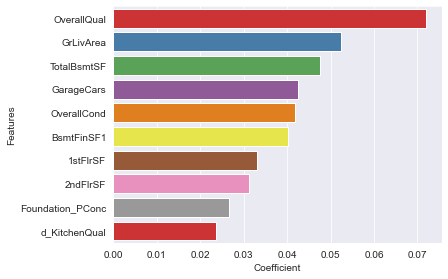

In [77]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

The Above given `Bar graph` depicts these are the top 10 variables based ont the `Ridge Regression` model, which are palying the vital role in predicting the price.

## Lasso

In [78]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [79]:
# Printing the best hyperparameter alpha
print(lasso_model_cv.best_params_)

{'alpha': 0.002}


In [80]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
6,0.002,-0.082758,-0.087634,1
7,0.003,-0.082919,-0.087736,2
5,0.001,-0.082421,-0.087854,3
0,0.0001,-0.081905,-0.087946,4
1,0.0002,-0.081947,-0.087964,5
4,0.0005,-0.082118,-0.087977,6
2,0.0003,-0.081994,-0.087987,7
8,0.004,-0.083217,-0.088001,8
3,0.0004,-0.082053,-0.088009,9
9,0.005,-0.083700,-0.088395,10


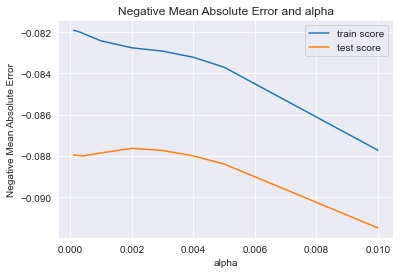

In [81]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [82]:
# check the coefficient values with lambda = 0.002

alpha = 0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.0190262 ,  0.01997121,  0.08405452,  0.04426672,  0.04259702,
        0.00625992, -0.        ,  0.05094044,  0.00183016,  0.        ,
       -0.00298626,  0.09532673,  0.01425539,  0.015717  ,  0.0187825 ,
        0.04433742, -0.01649779, -0.02820976,  0.01692369,  0.01639107,
        0.01952618,  0.01785236,  0.01578071,  0.02426344,  0.02173577,
        0.00071345,  0.02392475, -0.        ,  0.02009691,  0.01482086,
       -0.0157374 ,  0.01320758,  0.0134198 , -0.        ,  0.        ,
       -0.        , -0.        ,  0.00177232, -0.00331615,  0.02623712])

In [83]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9064145674483862
0.906418596933197
12.298203686329463
5.030427472740913
0.013209670984242174
0.012576068681852282


In [84]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0190
1,LotArea,0.0200
2,OverallQual,0.0841
3,OverallCond,0.0443
4,BsmtFinSF1,0.0426
5,BsmtFinSF2,0.0063
6,TotalBsmtSF,0.0509
7,1stFlrSF,0.0018
8,LowQualFinSF,-0.0030
9,GrLivArea,0.0953


In [85]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.01902619567936685,
 'LotArea': 0.01997120862001562,
 'OverallQual': 0.08405452145045363,
 'OverallCond': 0.04426672140322597,
 'BsmtFinSF1': 0.04259702195663264,
 'BsmtFinSF2': 0.006259918044177354,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': 0.05094044142248221,
 '1stFlrSF': 0.001830161512372441,
 '2ndFlrSF': 0.0,
 'LowQualFinSF': -0.0029862642391816595,
 'GrLivArea': 0.09532673226197201,
 'BsmtFullBath': 0.014255394928435241,
 'FullBath': 0.01571700135816942,
 'HalfBath': 0.018782499273955176,
 'GarageCars': 0.04433741666450833,
 'IsRemodelled': -0.016497790689687333,
 'BuildingAge': -0.028209755465089865,
 'GarageNewOrOld': 0.01692368899013358,
 'd_HeatingQC': 0.01639107482844784,
 'd_KitchenQual': 0.019526178475382364,
 'd_FireplaceQu': 0.017852364316790523,
 'd_HouseStyle': 0.01578071029378213,
 'd_SaleCondition': 0.0242634397040352,
 'MSZoning_FV': 0.02173576640580503,
 'MSZoning_RH': 0.0007134477864154799,
 'MSZoning_RL': 0.02392475189270828,
 'MSZoning_RM': -0.0,
 'Ne

### Using RFE for the feature selection:-

In [86]:
# Performing RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [87]:
# Displaying  the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.095327
1,OverallQual,True,1,0.084055
4,TotalBsmtSF,True,1,0.050940
6,GarageCars,True,1,0.044337
2,OverallCond,True,1,0.044267
3,BsmtFinSF1,True,1,0.042597
14,Foundation_PConc,True,1,0.026237
11,d_SaleCondition,True,1,0.024263
13,MSZoning_RL,True,1,0.023925
12,MSZoning_FV,True,1,0.021736


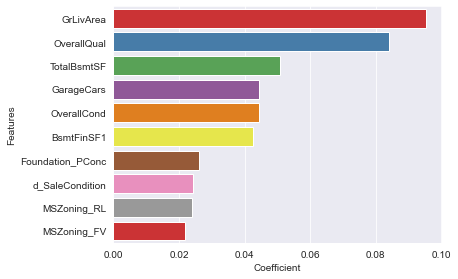

In [88]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

The Above given `Bar Graph` shows the top 10 variables based on Lasso Regression model which are significant in predicting the price of a house.

In [89]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.214163e-01,0.905972,0.906415
1,R2 Score (Test),-2.097750e+09,0.905748,0.906419
2,RSS (Train),1.032680e+01,12.356309,12.298204
3,RSS (Test),1.127636e+11,5.066497,5.030427
4,MSE (Train),1.053193e-01,0.115205,0.114933
5,MSE (Test),1.679015e+04,0.112544,0.112143


## Conclusion:- 

- The Optimal lambda value in case of Ridge and Lasso are:-
   - Ridge - 100
   - Lasso - 0.002
   
- The Mean Squared error in case of Ridge and Lasso are :-
   - Ride - 0.112(on Test set)
   - Lasso - 0.112 ( on Test set)
   
- Ridge is only used to regularize to coefficient values while Lass  can   can be used in feature selection along with coefficients values.   
